# Temperatura externa y consumo de energía

Vamos a modelar el consumo de energía de energía de cinco edificios a partir de la temperatura externa (*Outdoor Air Temperature* o OAT) como variable predictiva

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from scipy import stats

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

Importamos el dataset de los edificios 1 a 5.

In [ ]:
!wget https://openei.org/datasets/dataset/649aa6d3-2832-4978-bc6e-fa563568398e/resource/b710e97d-29c9-4ca5-8137-63b7cf447317/download/building1retail.csv

--2021-04-19 04:40:47--  https://openei.org/datasets/dataset/649aa6d3-2832-4978-bc6e-fa563568398e/resource/b710e97d-29c9-4ca5-8137-63b7cf447317/download/building1retail.csv
Resolving openei.org (openei.org)... 23.21.46.23, 50.17.197.26
Connecting to openei.org (openei.org)|23.21.46.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 885170 (864K) [text/csv]
Saving to: ‘building1retail.csv’

building1retail.csv 100%[===================>] 864.42K  --.-KB/s    in 0.04s   

2021-04-19 04:40:48 (21.3 MB/s) - ‘building1retail.csv’ saved [885170/885170]



In [ ]:
!wget https://openei.org/datasets/dataset/649aa6d3-2832-4978-bc6e-fa563568398e/resource/4d721c37-119c-43c8-a722-a36f5eea26c8/download/building2retail.csv

--2021-04-19 04:43:19--  https://openei.org/datasets/dataset/649aa6d3-2832-4978-bc6e-fa563568398e/resource/4d721c37-119c-43c8-a722-a36f5eea26c8/download/building2retail.csv
Resolving openei.org (openei.org)... 50.17.197.26, 23.21.46.23
Connecting to openei.org (openei.org)|50.17.197.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 885333 (865K) [text/csv]
Saving to: ‘building2retail.csv’

building2retail.csv 100%[===================>] 864.58K  --.-KB/s    in 0.05s   

2021-04-19 04:43:20 (17.0 MB/s) - ‘building2retail.csv’ saved [885333/885333]



In [ ]:
!wget https://openei.org/datasets/dataset/649aa6d3-2832-4978-bc6e-fa563568398e/resource/8a91474a-a20d-4dd2-b6a1-e5412a4e6c59/download/building3retail.csv

--2021-04-19 04:44:19--  https://openei.org/datasets/dataset/649aa6d3-2832-4978-bc6e-fa563568398e/resource/8a91474a-a20d-4dd2-b6a1-e5412a4e6c59/download/building3retail.csv
Resolving openei.org (openei.org)... 23.21.46.23, 50.17.197.26
Connecting to openei.org (openei.org)|23.21.46.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 878214 (858K) [text/csv]
Saving to: ‘building3retail.csv’

building3retail.csv 100%[===================>] 857.63K  --.-KB/s    in 0.1s    

2021-04-19 04:44:21 (6.95 MB/s) - ‘building3retail.csv’ saved [878214/878214]



In [ ]:
!wget https://openei.org/datasets/dataset/649aa6d3-2832-4978-bc6e-fa563568398e/resource/c9b11976-a906-4a41-80b0-7f4b81311a13/download/building4retail.csv

--2021-04-19 04:44:55--  https://openei.org/datasets/dataset/649aa6d3-2832-4978-bc6e-fa563568398e/resource/c9b11976-a906-4a41-80b0-7f4b81311a13/download/building4retail.csv
Resolving openei.org (openei.org)... 50.17.197.26, 23.21.46.23
Connecting to openei.org (openei.org)|50.17.197.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 884516 (864K) [text/csv]
Saving to: ‘building4retail.csv’

building4retail.csv 100%[===================>] 863.79K  --.-KB/s    in 0.03s   

2021-04-19 04:44:56 (27.0 MB/s) - ‘building4retail.csv’ saved [884516/884516]



In [ ]:
!wget https://openei.org/datasets/dataset/649aa6d3-2832-4978-bc6e-fa563568398e/resource/d31fa61c-def9-4142-b58d-27f434163892/download/building5retail.csv

--2021-04-19 04:45:08--  https://openei.org/datasets/dataset/649aa6d3-2832-4978-bc6e-fa563568398e/resource/d31fa61c-def9-4142-b58d-27f434163892/download/building5retail.csv
Resolving openei.org (openei.org)... 50.17.197.26, 23.21.46.23
Connecting to openei.org (openei.org)|50.17.197.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 885225 (864K) [text/csv]
Saving to: ‘building5retail.csv’

building5retail.csv 100%[===================>] 864.48K  --.-KB/s    in 0.05s   

2021-04-19 04:45:08 (15.8 MB/s) - ‘building5retail.csv’ saved [885225/885225]



Leemos los datos con Pandas como dataframes y unimos los datos en un único dataframe.

In [ ]:
f1 = "/content/building1retail.csv"
f2 = "/content/building2retail.csv"
f3 = "/content/building3retail.csv"
f4 = "/content/building4retail.csv"
f5 = "/content/building5retail.csv"

df1 = pd.read_csv(f1, index_col=[0], parse_dates=True)
df2 = pd.read_csv(f2, index_col=[0], parse_dates=True)
df3 = pd.read_csv(f3, index_col=[0], parse_dates=True)
df4 = pd.read_csv(f4, index_col=[0], parse_dates=True)
df5 = pd.read_csv(f5, index_col=[0], parse_dates=True)

df = pd.concat([df1,df2,df3,df4,df5])
df

,OAT (F),Power (kW)
Timestamp,,
2010-01-01 01:15:00,51,165.1
2010-01-01 01:30:00,51,151.6
2010-01-01 01:45:00,51,146.9
2010-01-01 02:00:00,51,153.7
2010-01-01 02:15:00,51,153.8
...,...,...
2010-12-30 23:00:00,67,333.7
2010-12-30 23:15:00,68,221.0
2010-12-30 23:30:00,68,235.7


# Exploración de datos

El dataframe, como se muestra en la anterior celda, no contiene errores en los títulos de las columnas y no es necesario quitar filas. Además, todas las columnas son relevantes, por lo que no es necesario quitar columnas. 

Ahora veamos si hay datos faltantes:

In [ ]:
df.isnull().sum()

OAT (F)       0
Power (kW)    0
dtype: int64

Lo que nos dice que no hay datos faltantes en las columnas a trabajar.

Ahora una vista previa de los datos:

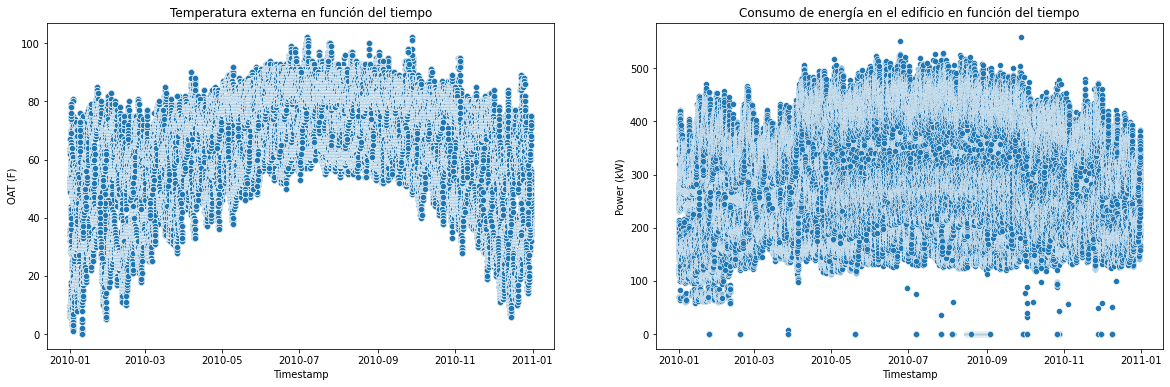

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.scatterplot(data=df, x="Timestamp", y="OAT (F)", ax=ax[0])
sns.scatterplot(data=df, x="Timestamp", y="Power (kW)", ax=ax[1])

ax[0].set(title="Temperatura externa en función del tiempo")
ax[1].set(title="Consumo de energía en el edificio en función del tiempo");

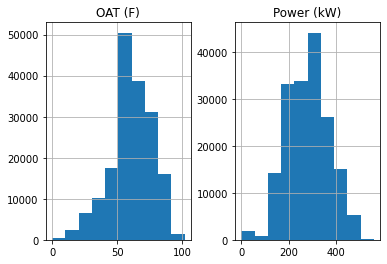

In [ ]:
df.hist();

Los datos de la potencia parecieran tener un comportamiento normal a primera vista, mientras que los datos de la temperatura tienen un pico bien definido pero cuentan con menos simetría respecto a este pico.

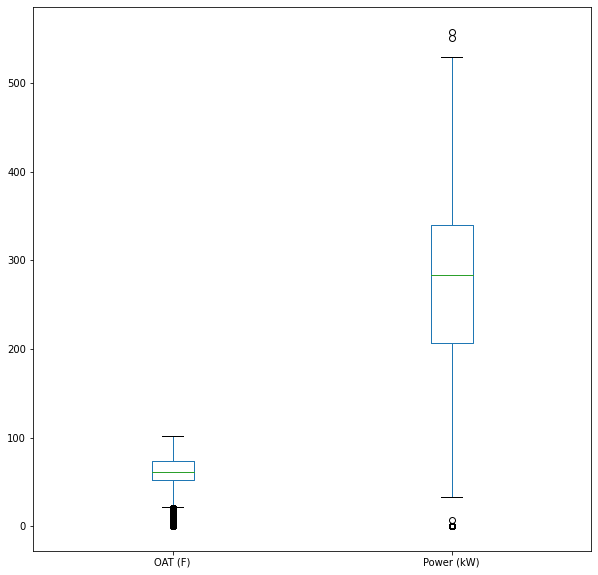

In [ ]:
df.plot(kind='box', figsize=(10,10));

**Estandarización**

Este gráfico nos permite ver que hay datos por fuera de tres desviaciones estándar, además, parece que en ambos casos la media no está alejada de la mitad de la caja, es decir, se encuentra cerca a la mitad de $\pm \sigma$, siendo $\sigma$ la desviación estándar de la distribución asumiéndola gaussiana. Para ello vamos a medir los datos en unidades de la desviación estándar a partir de la media,usando la variable:
$$
z = \frac{x-\mu}{\sigma}
$$

y vamos a filtrar aquellos datos donde la potencia o la temperatura estén alejados $\pm 3\sigma$ de la media.

In [ ]:
std_dev = 3
outliers = (np.abs(stats.zscore(df)) < std_dev).all(axis=1) #dejamos solo los datos cuya temperatura y potencia esten en +/- 3sigma
df_limpio = df[outliers]
print(len(df))
print(len(df_limpio))
df_limpio

174700
172034


,OAT (F),Power (kW)
Timestamp,,
2010-01-01 01:15:00,51,165.1
2010-01-01 01:30:00,51,151.6
2010-01-01 01:45:00,51,146.9
2010-01-01 02:00:00,51,153.7
2010-01-01 02:15:00,51,153.8
...,...,...
2010-12-30 23:00:00,67,333.7
2010-12-30 23:15:00,68,221.0
2010-12-30 23:30:00,68,235.7


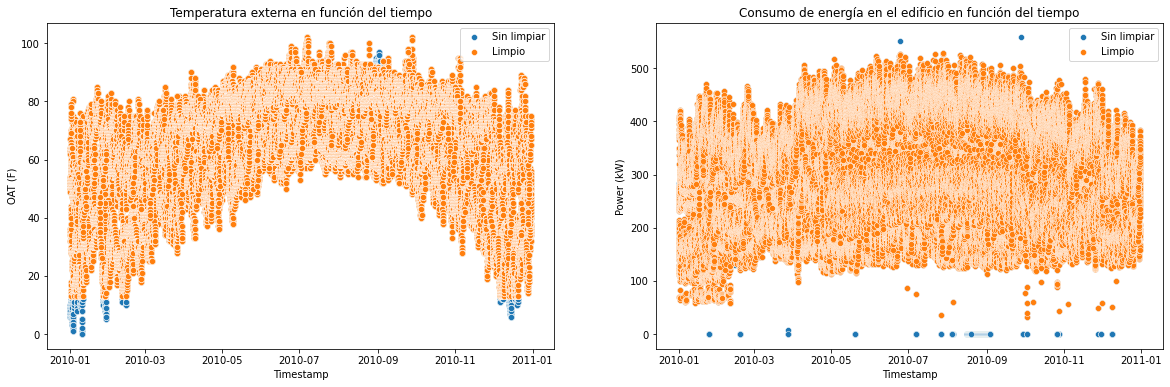

In [122]:
fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.scatterplot(data=df, x="Timestamp", y="OAT (F)", ax=ax[0],label='Sin limpiar')
sns.scatterplot(data=df_limpio, x="Timestamp", y="OAT (F)", ax=ax[0],label='Limpio')
sns.scatterplot(data=df, x="Timestamp", y="Power (kW)", ax=ax[1],label='Sin limpiar')
sns.scatterplot(data=df_limpio, x="Timestamp", y="Power (kW)", ax=ax[1], label='Limpio')

ax[0].set(title="Temperatura externa en función del tiempo")
ax[1].set(title="Consumo de energía en el edificio en función del tiempo");

Veamos como se relacionan las variables entre ellas. Nos interesa el consumo de energía en los edificios como función de la temperatura externa.

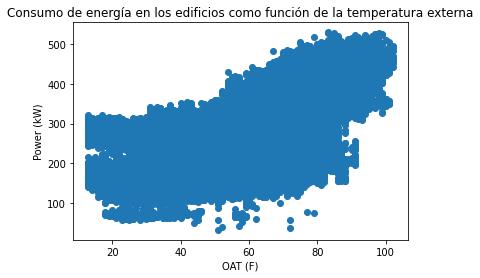

In [127]:
plt.scatter(df_limpio['OAT (F)'], df_limpio['Power (kW)'])
plt.xlabel('OAT (F)')
plt.ylabel('Power (kW)')
plt.title('Consumo de energía en los edificios como función de la temperatura externa');

La temperatura a lo largo de un día:

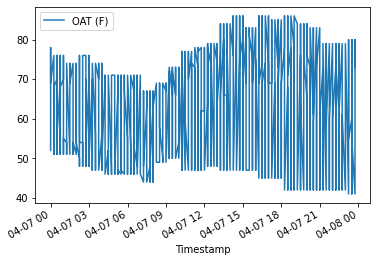

In [129]:
fig, ax = plt.subplots()
df_limpio.loc['2010-04-07', ['OAT (F)']].plot(ax=ax)

y el consumo de energía:

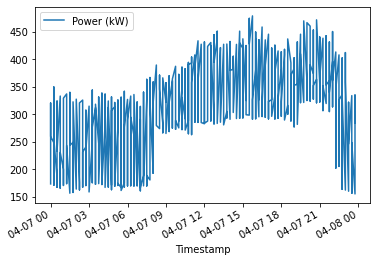

In [130]:
fig, ax = plt.subplots()
df.loc['2010-04-07', ['Power (kW)']].plot(ax=ax)

# Regresión Lineal

Inicialmente se entrena el modelo, para ello se define el modelo de regresión lineal, se dividen los datos y se entrena el modelo.

In [141]:
X = pd.DataFrame(df_limpio['OAT (F)'])
y = pd.DataFrame(df_limpio['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

El intercepto de la recta con el eje vertical:

In [145]:
linear_regression.intercept_

array([91.92063352])

La pendiente de la recta:

In [146]:
linear_regression.coef_

array([[3.13262704]])

El valor $R^2$ que servirá de referencia:

In [147]:
linear_regression.score(X_test,y_test)

0.3410461701600477

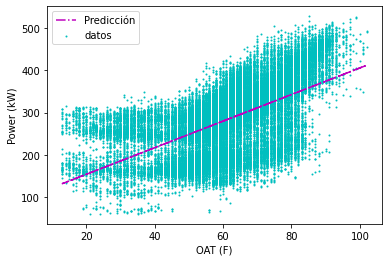

In [169]:
y_pred = linear_regression.intercept_[0] + linear_regression.coef_[0][0] * X_test.values.flatten()
plt.scatter(X_test.values.flatten(),y_test.values.flatten(),s=1,label='datos',color='c')
plt.plot(X_test.values.flatten(), y_pred, '-.m',label='Predicción')
plt.legend()
plt.ylabel('Power (kW)')
plt.xlabel('OAT (F)');

Usando la hora del día como variable categórica:

In [173]:
df_limpio['hour'] = df_limpio.index.hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [174]:
df_limpio

,OAT (F),Power (kW),hour
Timestamp,,,
2010-01-01 01:15:00,51,165.1,1
2010-01-01 01:30:00,51,151.6,1
2010-01-01 01:45:00,51,146.9,1
2010-01-01 02:00:00,51,153.7,2
2010-01-01 02:15:00,51,153.8,2
...,...,...,...
2010-12-30 23:00:00,67,333.7,23
2010-12-30 23:15:00,68,221.0,23
2010-12-30 23:30:00,68,235.7,23


Definimos de nuevo nuestra matriz de datos $X$ y el vector de resultados $y$

In [176]:
X = pd.DataFrame(df_limpio[['OAT (F)','hour']])
y = pd.DataFrame(df_limpio['Power (kW)'])

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

In [178]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Ahora tenemos dos pendientes, una da la relación entre la temperatura del ambiente y el consumo de energía y la otra da la relación entre la hora y el consumo de energía. Comparando los valores parece que el consumo de energía es más susceptible a la hora del día.

In [179]:
linear_regression.coef_

array([[2.75703779, 6.10308917]])

El valor $R^2$ de esto nuevo modelo con dos predictores (hora del día y OAT):

In [180]:
linear_regression.score(X_test,y_test)

0.5826066979891411

Es apreciable la diferencia respecto a nuestro valor de referencia (0.3410).

Gráficamente, la relación entre los predictores y el consumo de energía:

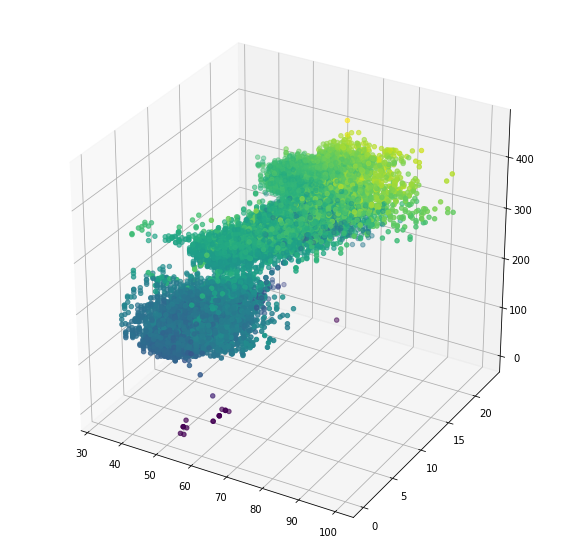

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['OAT (F)'], X_train['hour'], y_train, c=y_train, cmap='viridis')

Considerando una característica cualitativa que refleje el estado de la tienda: abierto (1) o cerrado (0).

¿Cuál es el horario de apertura de la tienda? 9h a 21h 

In [185]:
df_limpio['open_hours'] = np.where((df_limpio.index.hour >= 9) & (df_limpio.index.hour <= 21),1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [186]:
df_limpio.sample(10)

,OAT (F),Power (kW),hour,open_hours
Timestamp,,,,
2010-11-28 15:30:00,56,300.7,15,1
2010-07-06 08:45:00,78,348.4,8,0
2010-12-10 07:15:00,50,170.0,7,0
2010-09-11 07:30:00,57,216.4,7,0
2010-10-25 04:15:00,60,177.9,4,0
2010-01-15 11:00:00,68,269.0,11,1
2010-09-25 15:00:00,82,457.2,15,1
2010-04-06 00:15:00,67,246.1,0,0
2010-06-08 10:15:00,62,286.6,10,1


In [188]:
X = pd.DataFrame(df_limpio[['OAT (F)','open_hours', 'hour']])
y = pd.DataFrame(df_limpio['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

linear_regression.score(X_test,y_test)

0.6957277604435634

Nuevamente se tiene una mejora en el valor de $R^2$ respecto al valor de referencia (0.3410). Intentemos agregar una nueva variable que represente el cuadrado de la temperatura:

In [191]:
df_limpio['OAT^2 (F^2)'] = df_limpio['OAT (F)'].values * df_limpio['OAT (F)'].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [192]:
df_limpio

,OAT (F),Power (kW),hour,open_hours,OAT^2 (F^2)
Timestamp,,,,,
2010-01-01 01:15:00,51,165.1,1,0,2601
2010-01-01 01:30:00,51,151.6,1,0,2601
2010-01-01 01:45:00,51,146.9,1,0,2601
2010-01-01 02:00:00,51,153.7,2,0,2601
2010-01-01 02:15:00,51,153.8,2,0,2601
...,...,...,...,...,...
2010-12-30 23:00:00,67,333.7,23,0,4489
2010-12-30 23:15:00,68,221.0,23,0,4624
2010-12-30 23:30:00,68,235.7,23,0,4624


Agreguemos este nuevo predictor y calculemos el valor de $R^2$

In [193]:
X = pd.DataFrame(df_limpio[['OAT (F)','open_hours', 'hour', 'OAT^2 (F^2)']])
y = pd.DataFrame(df_limpio['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

linear_regression.score(X_test,y_test)

0.7321262446661976

Nuevamente se obtiene mejora respecto al valor de referencia (0.3410) y también respecto al mejor valor obtenido hasta el momento, es decir, el obtenido agregando el estado de la tienda (0.6957).

Y si agregamos otro orden en la temperatura...

In [194]:
df_limpio['OAT^3 (F^3)'] = df_limpio['OAT^2 (F^2)'].values * df_limpio['OAT (F)'].values
df_limpio

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,OAT (F),Power (kW),hour,open_hours,OAT^2 (F^2),OAT^3 (F^3)
Timestamp,,,,,,
2010-01-01 01:15:00,51,165.1,1,0,2601,132651
2010-01-01 01:30:00,51,151.6,1,0,2601,132651
2010-01-01 01:45:00,51,146.9,1,0,2601,132651
2010-01-01 02:00:00,51,153.7,2,0,2601,132651
2010-01-01 02:15:00,51,153.8,2,0,2601,132651
...,...,...,...,...,...,...
2010-12-30 23:00:00,67,333.7,23,0,4489,300763
2010-12-30 23:15:00,68,221.0,23,0,4624,314432
2010-12-30 23:30:00,68,235.7,23,0,4624,314432


In [195]:
X = pd.DataFrame(df_limpio[['OAT (F)','open_hours', 'hour', 'OAT^2 (F^2)', 'OAT^3 (F^3)']])
y = pd.DataFrame(df_limpio['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

linear_regression.score(X_test,y_test)

0.7322809224502129

No se aprecia una mejora significativa respecto al valor anterior (0.7323), sin embargo agreguemos otro orden a la temperatura:

In [197]:
df_limpio['OAT^4 (F^4)'] = df_limpio['OAT^3 (F^3)'].values * df_limpio['OAT (F)'].values
df_limpio

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,OAT (F),Power (kW),hour,open_hours,OAT^2 (F^2),OAT^3 (F^3),OAT^4 (F^4)
Timestamp,,,,,,,
2010-01-01 01:15:00,51,165.1,1,0,2601,132651,6765201
2010-01-01 01:30:00,51,151.6,1,0,2601,132651,6765201
2010-01-01 01:45:00,51,146.9,1,0,2601,132651,6765201
2010-01-01 02:00:00,51,153.7,2,0,2601,132651,6765201
2010-01-01 02:15:00,51,153.8,2,0,2601,132651,6765201
...,...,...,...,...,...,...,...
2010-12-30 23:00:00,67,333.7,23,0,4489,300763,20151121
2010-12-30 23:15:00,68,221.0,23,0,4624,314432,21381376
2010-12-30 23:30:00,68,235.7,23,0,4624,314432,21381376


In [198]:
X = pd.DataFrame(df_limpio[['OAT (F)','open_hours', 'hour', 'OAT^2 (F^2)', 'OAT^3 (F^3)','OAT^4 (F^4)']])
y = pd.DataFrame(df_limpio['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

linear_regression.score(X_test,y_test)

0.7325848692788357

Tampoco se aprecia una mejora considerable respecto al obtenido solo considerando el cuadrado de la temperatura.

Puesto que incluir más parámetros agrega complejidad al sistema, además de abstracción en el caso de potencias de la temperatura, se dedice dejar el modelo que usa como predictores, la temperatura, su cuadrado, la hora del día y el estado de las tiendas, dando como valor de $R^2$ 0.7321.
